All imports

In [143]:
import re  
import nltk 
nltk.download('stopwords')
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Upload the data that will be used in this file

In [144]:
train  = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

Print sample of data

In [145]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


Print sample of positive tweets

In [146]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


Print sample of negative tweets

In [147]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


Print the the number of rows and columns for each file

In [148]:
train.shape,test.shape

((31962, 3), (17197, 2))

Print the number of both the good and bad tweets

In [149]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Shows a plot comparing the number of tweets in the train file and the test file

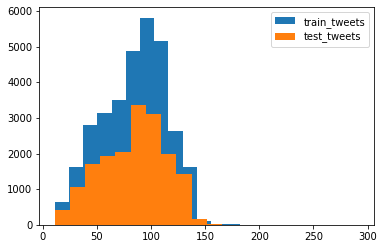

In [150]:
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()
plt.hist(train_length,bins=20,label="train_tweets")
plt.hist(test_length,bins=20,label="test_tweets")
plt.legend()
plt.show()

Combines both the training file and the test file

In [151]:
combi = train.append(test,ignore_index=True,sort=False)
combi.shape

(49159, 3)

Function that allows the user to remove a specific string from the tweets

In [152]:
def remove_string(input_txt,string):
    r = re.findall(string,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt    

In [153]:
np.vectorize

numpy.vectorize

Removing twitter handles @user


In [154]:
combi['tidy_tweet'] = np.vectorize(remove_string)(combi['tweet'], "@[\w]*") 


Removing punctuations , numbers and special charecters

In [158]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head()

C:\Users\pc\AppData\Local\Temp/ipykernel_8128/3678682707.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,w n f r func l n elf h r g h k n h func #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,h nk f #l f c c n u e c u e n fer w elch r v n n p x # p n e #ge h nke
2,3,0.0,bihday your majesty,b h je
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,# el l u ke w h u n ur
4,5,0.0,factsguide: society now #motivation,f c gu e c e w # v


Splits the tweet into individual words

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

0                    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]
1    [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                       [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                           [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

Stems the words in the tokenized tweets

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet    

Function to collect hashtags

In [ ]:

def hashtag_extract(x):    
    hashtags = []  
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)     
    return hashtags

Extracts hashtags from all tweets

In [ ]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Displays the top 10 used words in all the cleaned tweets

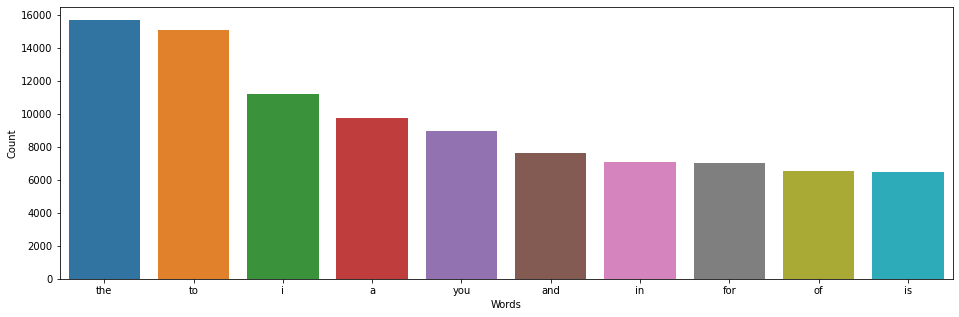

In [ ]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
a = nltk.FreqDist(all_words.split())
d = pd.DataFrame({'Words': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 10 most frequent words  
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Words", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

Displays the top 10 used words in all the good tweets

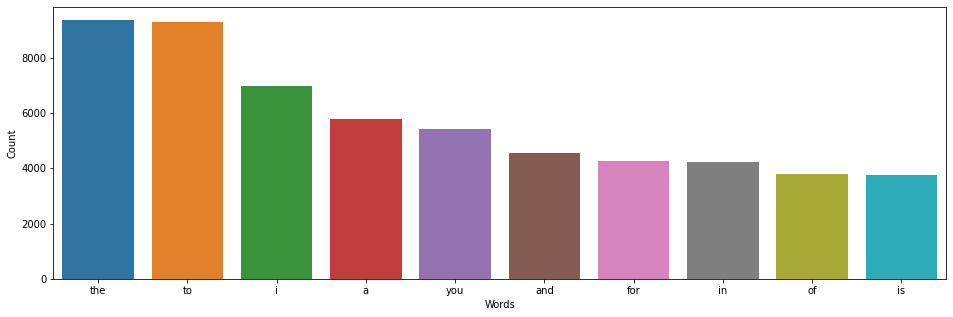

In [ ]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]]) 
a = nltk.FreqDist(normal_words.split())
d = pd.DataFrame({'Words': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 10 most frequent words  
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Words", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

Displays the top 10 used words in all the bad tweets

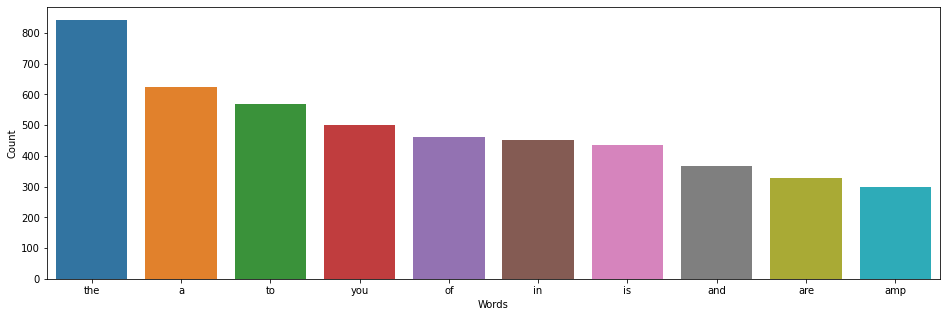

In [ ]:
bad_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]]) 
a = nltk.FreqDist(bad_words.split())
d = pd.DataFrame({'Words': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 10 most frequent words  
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Words", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

Displays top 20 used hashtags in good tweets

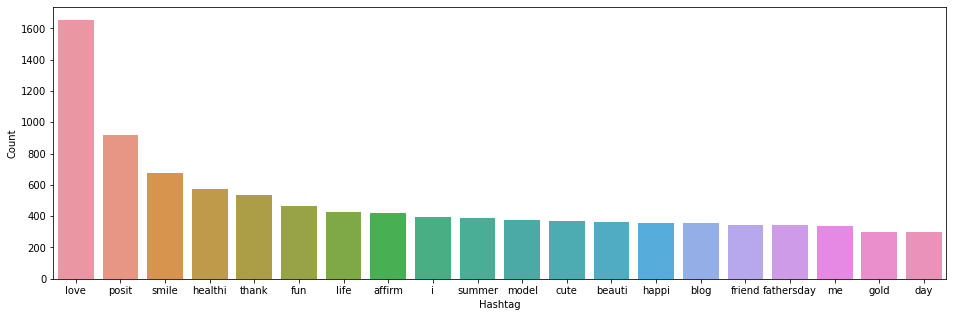

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

Displays top 20 used hashtags in bad tweets

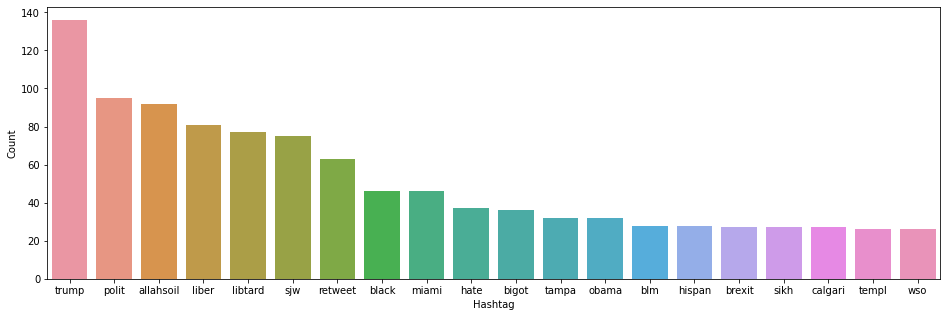

In [ ]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

initializes the IF_IDF feature to analyize the test tweets

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

Initializes the modeling using logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Trains the model

In [ ]:
lreg = LogisticRegression() 
#extract both train and test data
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
#split data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)
#training the model
lreg.fit(xtrain_tfidf, ytrain) 
# predicting on the validation set
prediction = lreg.predict_proba(xvalid_tfidf) 
# if prediction is greater than or equal to 0.25than 1 else 0
prediction_int = prediction[:,1] >= 0.25
prediction_int = prediction_int.astype(np.int) 
# calculating f1 score for the validation set
f1_score(yvalid, prediction_int)
# test_pred = lreg.predict_proba(xvalid_tfidf)
# test_pred_int = test_pred[:,1] >= 0.3 
# test_pred_int = test_pred_int.astype(np.int) 
# test['label'] = test_pred_int 
# submission = test[['id','label']] 
# submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

0.5626515763945028